## Import

Obiettivo è confrontare la durata dei film con il rating, se sono correlati

Idea: come per la musica, chi vede i film se sono troppo lunghi o troppo corti ne è influenzato?

Idea: come per la musica, chi vede i film se sono troppo lunghi o troppo corti ne è influenzato

Ultimo aggiornamento dataset: 19-11-2019

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataframeTitoli = pd.read_csv("./dataNew/title_basics.tsv", sep="\t", low_memory=False)
dataframeRating = pd.read_csv("./dataNew/title_ratings.tsv", sep="\t", low_memory=False)

In [3]:
mergedDataframe = pd.merge(dataframeTitoli, dataframeRating, on="tconst")

In [4]:
mergedDataframe.shape

(1206286, 11)

In [5]:
mergedDataframe.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1848
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.0,241
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1616
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",6.0,156
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2439


In [6]:
mergedDataframe.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1848
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.0,241
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1616
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",6.0,156
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2439


## Data Cleaning

In [7]:
mergedDataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206286 entries, 0 to 1206285
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   tconst          1206286 non-null  object 
 1   titleType       1206286 non-null  object 
 2   primaryTitle    1206286 non-null  object 
 3   originalTitle   1206286 non-null  object 
 4   isAdult         1206286 non-null  object 
 5   startYear       1206286 non-null  object 
 6   endYear         1206286 non-null  object 
 7   runtimeMinutes  1206286 non-null  object 
 8   genres          1206284 non-null  object 
 9   averageRating   1206286 non-null  float64
 10  numVotes        1206286 non-null  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 110.4+ MB


Check for null values

In [8]:
mergedDataframe.isna().sum()

tconst            0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres            2
averageRating     0
numVotes          0
dtype: int64

Dropping unnecessary columns

In [9]:
mergedDataframe = mergedDataframe.drop(['isAdult', 'endYear'], axis=1)

In [10]:
mergedDataframe.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'startYear',
       'runtimeMinutes', 'genres', 'averageRating', 'numVotes'],
      dtype='object')

Fix data types

In [11]:
mergedDataframe.dtypes

tconst             object
titleType          object
primaryTitle       object
originalTitle      object
startYear          object
runtimeMinutes     object
genres             object
averageRating     float64
numVotes            int64
dtype: object

In [12]:
mergedDataframe['titleType'] = pd.Categorical(mergedDataframe['titleType'])

In [13]:
mergedDataframe['titleType'].cat.categories

Index(['movie', 'short', 'tvEpisode', 'tvMiniSeries', 'tvMovie', 'tvSeries',
       'tvShort', 'tvSpecial', 'video', 'videoGame'],
      dtype='object')

Problema dato da caratteri \N presenti nel dataset

In [14]:
mergedDataframe.runtimeMinutes = pd.to_numeric(mergedDataframe.runtimeMinutes, errors ='coerce').fillna(0).astype('int')

In [15]:
mergedDataframe.sort_values(by='runtimeMinutes', ascending=False).head()

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
1149572,tt8273150,movie,Logistics,Logistics,2012,51420,Documentary,6.1,112
918343,tt3854496,movie,Ambiancé,Ambiancé,2020,43200,Documentary,5.2,77
550742,tt12095652,video,The Longest Video on YouTube: 596.5 Hours,The Longest Video on YouTube: 596.5 Hours,2011,35791,\N,6.8,14
839946,tt2659636,movie,Modern Times Forever,Modern Times Forever,2011,14400,Documentary,6.4,91
532125,tt11707418,tvSpecial,Svalbard Minute by Minute,Svalbard minutt for minutt,2020,13319,"Adventure,Documentary",8.1,21


In [16]:
mergedDataframe.dtypes

tconst              object
titleType         category
primaryTitle        object
originalTitle       object
startYear           object
runtimeMinutes       int32
genres              object
averageRating      float64
numVotes             int64
dtype: object

In [17]:
mergedDataframe.startYear = pd.to_numeric(mergedDataframe.startYear, errors ='coerce').fillna(0).astype('int')

### Modellazione

Risolvo criticità null values

In [18]:
mergedDataframe[mergedDataframe['runtimeMinutes'] == 0].shape

(336936, 9)

Divisione tra movie e altri

In [19]:
FilmDataframe = mergedDataframe[mergedDataframe['titleType'] == "movie"]

In [20]:
FilmDataframe.shape

(273805, 9)

In [21]:
film2 = FilmDataframe[(FilmDataframe['startYear'] == 2021)]

In [22]:
film2 = film2[film2['runtimeMinutes'] != 0]

In [23]:
film2 = film2[film2['numVotes'] > 15000]

In [24]:
film2.shape

(172, 9)

In [25]:
film2.head()

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
175094,tt0293429,movie,Mortal Kombat,Mortal Kombat,2021,110,"Action,Adventure,Fantasy",6.1,158375
262117,tt0499097,movie,Without Remorse,Without Remorse,2021,109,"Action,Thriller,War",5.8,52884
412969,tt0870154,movie,Jungle Cruise,Jungle Cruise,2021,127,"Action,Adventure,Comedy",6.6,163700
444836,tt0993840,movie,Army of the Dead,Army of the Dead,2021,148,"Action,Crime,Horror",5.7,160218
447173,tt10016180,movie,The Little Things,The Little Things,2021,128,"Crime,Drama,Mystery",6.3,87108


In [26]:
film2.sort_values(by='runtimeMinutes', ascending=False).head()

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
562056,tt12361974,movie,Zack Snyder's Justice League,Zack Snyder's Justice League,2021,242,"Action,Adventure,Fantasy",8.1,355993
1191219,tt9389998,movie,Pushpa: The Rise - Part 1,Pushpa: The Rise - Part 1,2021,179,"Action,Adventure,Crime",8.0,31694
476302,tt10579952,movie,Master,Master,2021,179,"Action,Thriller",7.8,67100
526159,tt11580854,movie,Sarpatta Parambarai,Sarpatta Parambarai,2021,173,"Action,Drama,Sport",8.7,19659
460503,tt10280296,movie,Sardar Udham,Sardar Udham,2021,164,"Biography,Crime,Drama",8.7,34721


In [27]:
film2.sort_values(by='runtimeMinutes').head()

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
529608,tt11657662,movie,The Witcher: Nightmare of the Wolf,The Witcher: Nightmare of the Wolf,2021,83,"Action,Adventure,Animation",7.3,38683
1199527,tt9684220,movie,Bad Trip,Bad Trip,2021,86,Comedy,6.6,22616
1159191,tt8521876,movie,Yes Day,Yes Day,2021,86,"Comedy,Family",5.7,21770
1204100,tt9844522,movie,Escape Room: Tournament of Champions,Escape Room: Tournament of Champions,2021,88,"Action,Adventure,Horror",5.8,32032
537254,tt11804152,movie,Till Death,Till Death,2021,88,Thriller,5.9,16648


In [28]:
mergedDataframe[mergedDataframe['titleType'] == "tvSeries"].shape

(79775, 9)

In [29]:
mergedDataframe[mergedDataframe['titleType'] == "tvSeries"].sort_values(by='startYear', ascending=False).head()

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
705318,tt16317564,tvSeries,The Live Free Sketch Show,The Live Free Sketch Show,2022,0,Comedy,9.0,20
707871,tt16420418,tvSeries,Ant & Dec's Limitless Win,Ant & Dec's Limitless Win,2022,0,Game-Show,6.0,29
648493,tt14456760,tvSeries,Run the Burbs,Run the Burbs,2022,30,Comedy,4.6,160
602317,tt13303478,tvSeries,We Baby Bears,We Baby Bears,2022,11,"Adventure,Animation,Comedy",6.9,66
706808,tt16381894,tvSeries,I Am Shauna Rae,I Am Shauna Rae,2022,0,Reality-TV,7.3,31


In [30]:
mergedDataframe[(mergedDataframe['titleType'] == "tvSeries") & (mergedDataframe['startYear'] == 1994)].sort_values(by='averageRating', ascending=False).head(20)

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
553046,tt12148314,tvSeries,Nokkhotrer Raat,Nokkhotrer Raat,1994,0,"Comedy,Drama,Family",9.5,233
862141,tt3016336,tvSeries,Storie maledette,Storie maledette,1994,0,\N,9.4,12
778112,tt2090741,tvSeries,Chubbies,Bumbari,1994,30,Musical,9.3,12
183409,tt0310342,tvSeries,Weird TV,Weird TV,1994,60,\N,9.3,20
94960,tt0128885,tvSeries,Na Paz dos Anjos,Na Paz dos Anjos,1994,0,\N,9.2,18
587995,tt1298821,tvSeries,Discovering Women,Discovering Women,1994,60,Documentary,9.2,7
80567,tt0108969,tvSeries,Traps,Traps,1994,60,Drama,9.2,19
463396,tt1033551,tvSeries,Plåstrets pirat-tv,Plåstrets pirat-tv,1994,15,"Comedy,Family",9.2,5
192668,tt0331400,tvSeries,The Steven Banks Show,The Steven Banks Show,1994,0,\N,9.1,32
80345,tt0108714,tvSeries,Breakfast Time,Breakfast Time,1994,120,Talk-Show,9.1,70


In [31]:
mergedDataframe[mergedDataframe['titleType'] == "tvMovie"].shape

(48220, 9)

In [32]:
mergedDataframe[mergedDataframe['titleType'] == "tvMovie"].sort_values(by='startYear', ascending=False).head(10)

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
584726,tt12905244,tvMovie,Clueless in Ireland,Clueless in Ireland,2022,90,"Comedy,Drama,Romance",5.7,38
674757,tt15202636,tvMovie,Deadly Ex Next Door,The Lakehouse Murders,2022,85,"Drama,Mystery,Thriller",4.9,72
636224,tt14124268,tvMovie,Ray Donovan: The Movie,Ray Donovan: The Movie,2022,100,Drama,7.2,1877
715340,tt16793678,tvMovie,Karin suomalaiset,Karin suomalaiset,2022,54,"Biography,Documentary",7.5,11
680682,tt15378928,tvMovie,Laura y el misterio del asesino inesperado,Laura y el misterio del asesino inesperado,2022,0,"Comedy,Crime,Mystery",7.9,49
708063,tt16427960,tvMovie,Horst Lichter - Keine Zeit für Arschlöcher,Horst Lichter - Keine Zeit für Arschlöcher,2022,89,"Biography,Drama",5.1,20
684585,tt15489380,tvMovie,Good Bad Girl,Good Bad Girl,2022,80,Drama,5.2,5
719869,tt17045592,tvMovie,Marusarz. Tatrzanski orzel,Marusarz. Tatrzanski orzel,2022,54,Biography,5.6,8
624568,tt13826702,tvMovie,Where Your Heart Belongs,Where Your Heart Belongs,2022,90,Romance,5.4,334
711700,tt16606760,tvMovie,"Karla, Rosalie und das Loch in der Wand","Karla, Rosalie und das Loch in der Wand",2022,88,"Comedy,Drama",5.1,10


## DataViz

## Waffle - rapporto tra film e serie tv nel dataset

In [33]:
from pywaffle import Waffle

In [34]:
mergedDataframe[mergedDataframe['titleType'] == "movie"].shape

(273805, 9)

In [35]:
mergedDataframe[mergedDataframe['titleType'] == "tvSeries"].shape

(79775, 9)

In [36]:
num_movie = 241193
num_tvSeries = 65991
tot_df = num_movie + num_tvSeries

In [37]:
perc_films = num_movie / tot_df * 100
print(perc_films)

78.51743580394812


In [38]:
perc_tvs = num_tvSeries / tot_df * 100
print(perc_tvs)

21.48256419605188


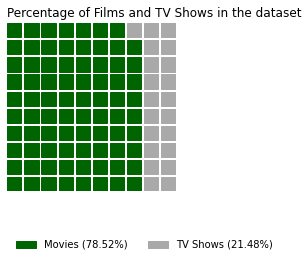

In [39]:
data = {'Movies': 78.52, 'TV Shows': 21.48}
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    values=data,
    colors=("#006400", "#A9A9A9"),
    title={'label': 'Percentage of Films and TV Shows in the dataset', 'loc': 'left'},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0}
)
fig.gca().set_facecolor("#ffffff")
fig.set_facecolor("#ffffff")
plt.show()

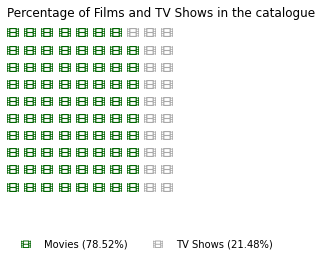

In [40]:
data = {'Movies': 78.52, 'TV Shows': 21.48}
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    values=data,
    colors=("#006400", "#A9A9A9"),
    title={'label': 'Percentage of Films and TV Shows in the catalogue', 'loc': 'left'},
    icons='film',
    font_size=12,
    icon_legend=True,
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0}
)
fig.gca().set_facecolor("#ffffff")
fig.set_facecolor("#ffffff")
plt.show()

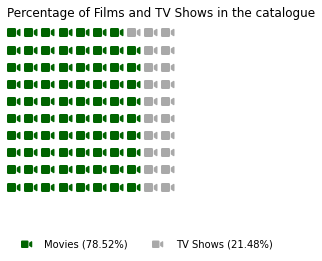

In [41]:
data = {'Movies': 78.52, 'TV Shows': 21.48}
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    values=data,
    colors=("#006400", "#A9A9A9"),
    title={'label': 'Percentage of Films and TV Shows in the catalogue', 'loc': 'left'},
    icons='video',
    font_size=12,
    icon_legend=True,
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0}
)
fig.gca().set_facecolor("#ffffff")
fig.set_facecolor("#ffffff")
plt.show()

source code: https://stackoverflow.com/questions/41400136/how-to-do-waffle-charts-in-python-square-piechart

## 1 - correlation btw years and duration of films

correlazione tra anni e durata dei film

domanda di ricerca: come per la musica, è vero che si è ridotta attenzione utenti e dunque si producono film meno lunghi rispetto a prima?

(forse dataset più adatto un archivio di film rispetto a netflix che ha molti film recenti;

inoltre all'inizio non si potevano fare film troppo lunghi per costi e tecnologie, quindi magari indagare trend più recente o spazio temporale ristretto)

In [42]:
film_years = mergedDataframe[(mergedDataframe['titleType'] == "movie") & (mergedDataframe['runtimeMinutes'] != 0) & (mergedDataframe['runtimeMinutes'] <= 400) & (mergedDataframe['numVotes'] >= 500) & (mergedDataframe['startYear'] != 0)][['titleType', 'startYear', 'runtimeMinutes']]

In [43]:
film_years_grouped = film_years.groupby('startYear')['startYear'].count()

In [44]:
film_years.shape

(52458, 3)

In [45]:
film_years_grouped.tail(20)

startYear
2003     891
2004    1080
2005    1145
2006    1300
2007    1326
2008    1335
2009    1469
2010    1425
2011    1534
2012    1664
2013    1783
2014    1895
2015    1914
2016    2007
2017    2134
2018    2149
2019    2098
2020    1400
2021    1188
2022      18
Name: startYear, dtype: int64

In [46]:
import plotly.graph_objects as px
import plotly.express as go

x = film_years['startYear']
y = film_years['runtimeMinutes']

plot = px.Figure(data=[px.Scatter(
    x=x,
    y=y,
    mode='markers',)
])

plot.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                step="year",
                stepmode="backward"),
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
    )
)

plot.show()

#### Line chart anni e durata film ultimi 15 anni

In [47]:
imdb_last15 = mergedDataframe[(mergedDataframe['titleType'] == "movie") & (mergedDataframe['runtimeMinutes'] != 0) & (mergedDataframe['numVotes'] >= 500) & (mergedDataframe['startYear'] > 2006)][['titleType', 'startYear', 'runtimeMinutes']]

In [48]:
imdb_last15_grouped = imdb_last15.groupby('startYear', as_index=False)

In [49]:
imdb_last15.groupby('startYear', as_index=False).size()

,startYear,size
0,2007,1326
1,2008,1335
2,2009,1469
3,2010,1425
4,2011,1534
5,2012,1664
6,2013,1783
7,2014,1895
8,2015,1914
9,2016,2008


In [50]:
mean_15 = imdb_last15_grouped.mean()

In [51]:
mean_15

,startYear,runtimeMinutes
0,2007,103.656863
1,2008,103.695131
2,2009,102.042886
3,2010,103.366316
4,2011,102.626467
5,2012,101.600361
6,2013,102.891195
7,2014,103.354617
8,2015,102.712644
9,2016,103.473108


In [52]:
mean_15.runtimeMinutes = mean_15.runtimeMinutes.round(2)
mean_15.head()

,startYear,runtimeMinutes
0,2007,103.66
1,2008,103.70
2,2009,102.04
3,2010,103.37
4,2011,102.63


<AxesSubplot:xlabel='startYear', ylabel='runtimeMinutes'>

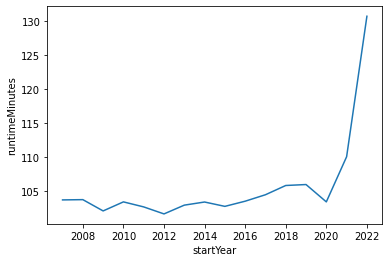

In [53]:
sns.lineplot(data=mean_15, x='startYear', y='runtimeMinutes')

<AxesSubplot:xlabel='startYear', ylabel='runtimeMinutes'>

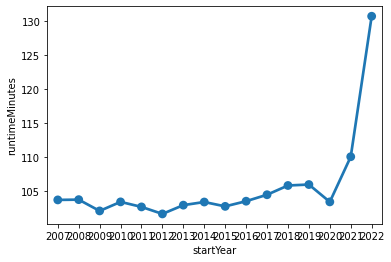

In [54]:
sns.pointplot(data=mean_15, x='startYear', y='runtimeMinutes')

!!! non va bene solo la media 

!!! asse y parte da troppo avanti

## 2 - bar chart difference btw number of movies or tv shows during the years

differenza tra numero di film e numero di serie tv legato all'anno di uscita

In [55]:
clean_df = mergedDataframe[(mergedDataframe['titleType'] == "movie") | (mergedDataframe['titleType'] == "tvSeries")][['titleType', 'startYear', 'runtimeMinutes', 'numVotes']]

In [56]:
clean_df = clean_df[(clean_df['runtimeMinutes'] != 0) & (clean_df['numVotes'] >= 500)][['titleType', 'startYear', 'runtimeMinutes', 'numVotes']]

In [57]:
#creazione nuovo dataframe
dataframe = pd.DataFrame({"startYear":[], "movie": [], "tvSeries":[]})
#ciclo for per ogni classe d'età
for item in clean_df["startYear"].unique():
  #query per identificare i record con punteggio peggiorato per la classe d'età in esame
  queryStringMovies = "startYear == "+str(item)+" and titleType == 'movie'"
  #query per identificare i record con punteggio migliorato per la classe d'età in esame
  queryStringTV = "startYear == "+str(item)+" and titleType == 'tvSeries'"

  #query
  resMovies = clean_df.query(queryStringMovies)
  resTV = clean_df.query(queryStringTV)
  #inserimento nel dataframe del numero di migliorati o peggiorati per la classe d'età in esame
  dataframe.loc[len(dataframe.index)] = [str(item), len(resMovies), len(resTV)]
#ordinamento delle classi d'età
dataframe = dataframe.sort_values("startYear")

dataframe.head()


,startYear,movie,tvSeries
113,0,1.0,0.0
0,1906,1.0,0.0
2,1911,1.0,0.0
1,1912,2.0,0.0
4,1913,8.0,0.0


In [58]:
dataframe['movie'] = dataframe['movie'].astype('float')
dataframe['tvSeries'] = dataframe['tvSeries'].astype('float')

dataframe = pd.eval("delta = dataframe.movie - dataframe.tvSeries", target=dataframe)

In [59]:
dataframe.head(1)

,startYear,movie,tvSeries,delta
113,0,1.0,0.0,1.0


In [60]:
import plotly.express as px
fig = px.line(dataframe, x="startYear", y=["movie", "tvSeries"])
fig.show()

In [61]:
import plotly.express as px
fig = px.line(dataframe, x="startYear", y=["movie", "tvSeries"])
fig.update_xaxes(type="log")
fig.show()

In [62]:
import plotly.express as px
fig = px.line(dataframe, x="startYear", y=["movie", "tvSeries"])
fig.update_xaxes(type="date")
fig.show()

In [63]:
dataframe.dtypes

startYear     object
movie        float64
tvSeries     float64
delta        float64
dtype: object

In [64]:
dataframe['startYear'] = dataframe['startYear'].astype('int')

In [65]:
dataframe.dtypes

startYear      int32
movie        float64
tvSeries     float64
delta        float64
dtype: object

In [66]:
# aggiungo decade al df

dataframe.loc[dataframe['startYear'] <= 1930, 'decade'] = 1930
dataframe.loc[dataframe['startYear'].between(1930,1940), 'decade'] = 1940
dataframe.loc[dataframe['startYear'].between(1940,1950), 'decade'] = 1950
dataframe.loc[dataframe['startYear'].between(1950,1960), 'decade'] = 1960
dataframe.loc[dataframe['startYear'].between(1960,1970), 'decade'] = 1970
dataframe.loc[dataframe['startYear'].between(1970,1980), 'decade'] = 1980
dataframe.loc[dataframe['startYear'].between(1980,1990), 'decade'] = 1990
dataframe.loc[dataframe['startYear'].between(1990,2000), 'decade'] = 2000
dataframe.loc[dataframe['startYear'].between(2000,2010), 'decade'] = 2010
dataframe.loc[dataframe['startYear'].between(2010,2020), 'decade'] = 2020
dataframe.loc[dataframe['startYear'].between(2020,2030), 'decade'] = 2030

In [67]:
dataframe['decade'] = pd.Categorical(dataframe['decade'])

In [68]:
dataframe_10 = dataframe.loc[dataframe['startYear'] >= 2010]

In [69]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set_style(style='white')

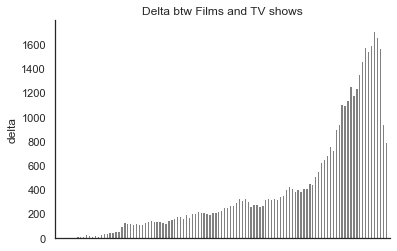

In [70]:
clrs = ['grey' if (x > min(dataframe['delta'])) else 'red' for x in dataframe['delta']]
ax = sns.barplot(x='startYear', y='delta', palette=clrs, data=dataframe)
sns.despine()

ax.set(xticklabels=[])  
ax.set(title='Delta btw Films and TV shows')
ax.set(xlabel=None)
ax.tick_params(bottom=False)  # remove the ticks

[Text(0.5, 1.0, 'Delta btw Films and TV shows')]

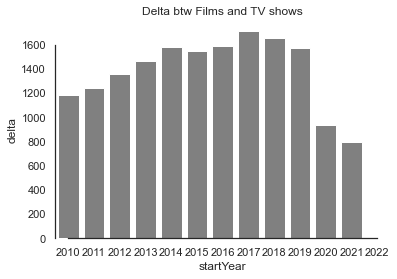

In [71]:
# dataframe_10['dPos'] = dataframe_10['delta'] >= 0
clrs = ['grey' if (x > min(dataframe_10['delta'])) else 'red' for x in dataframe_10['delta']]
ax = sns.barplot(x='startYear', y='delta', palette=clrs, data=dataframe_10)
sns.despine(trim=True)

ax.set(title='Delta btw Films and TV shows')

# IMDB

In [72]:
avg_rating = film2['averageRating'].mean()
avg_rating = avg_rating.round(2)
avg_rating

6.5

In [73]:
avg_minutes = film2['runtimeMinutes'].mean()
avg_minutes = avg_minutes.round(2)
avg_minutes

119.8

In [74]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [179]:
from bokeh.plotting import figure, show, save, output_file
from bokeh.layouts import layout
from bokeh.models import Div, RangeSlider, Spinner,Span, Label, LabelSet, ColumnDataSource, NumeralTickFormatter, HoverTool
from bokeh.models.callbacks import CustomJS
from bokeh.models import Range1d

datasource = ColumnDataSource(film2)

p = figure(title="Correlazione tra durata (in minuti) e rating medio dei film", x_axis_label="Minuti", y_axis_label="Rating")
p.x_range = Range1d(film2["runtimeMinutes"].min(), film2["runtimeMinutes"].max()) 
p.y_range = Range1d(0, 10) 
tooltips = [
  ('Durata(Min)','@runtimeMinutes'),
  ('Media Voti','@averageRating'),
  ('Titolo','@primaryTitle')
]
p.circle( x="runtimeMinutes", y  = "averageRating", size="size", source=datasource)
p.add_tools(HoverTool(tooltips = tooltips))
riga_avg_rating = Span(location=avg_rating, dimension="width", line_width=3, line_color="#AAAAAA")
riga_avg_minutes = Span(location=avg_minutes, dimension="height", line_width=3, line_color="#AAAAAA")
p.add_layout(riga_avg_rating)
p.add_layout(riga_avg_minutes)
show(p)

In [166]:
# calcolo diametro
import math

def calcola_diametro(numVoti):
    return 2 * math.sqrt(numVoti / math.pi)

In [168]:
film2['size'] = film2.numVotes.apply(func=calcola_diametro)

In [169]:
film2.head()

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,size,color
175094,tt0293429,movie,Mortal Kombat,Mortal Kombat,2021,110,"Action,Adventure,Fantasy",6.1,158375,449.053797,#2860000
262117,tt0499097,movie,Without Remorse,Without Remorse,2021,109,"Action,Thriller,War",5.8,52884,259.487957,#d80000
412969,tt0870154,movie,Jungle Cruise,Jungle Cruise,2021,127,"Action,Adventure,Comedy",6.6,163700,456.540593,#29c0000
444836,tt0993840,movie,Army of the Dead,Army of the Dead,2021,148,"Action,Crime,Horror",5.7,160218,451.659045,#28e0000
447173,tt10016180,movie,The Little Things,The Little Things,2021,128,"Crime,Drama,Mystery",6.3,87108,333.030555,#1640000


In [121]:
min = film2['size'].min()
min

138.32198176260812

In [122]:
max = film2['size'].max()
max

755.2920397712242

In [170]:
film2['size'] = ((film2['size'] - min) / (max - min) * 10) + 5

In [124]:
film2.head()

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,size
175094,tt0293429,movie,Mortal Kombat,Mortal Kombat,2021,110,"Action,Adventure,Fantasy",6.1,158375,10.036416
262117,tt0499097,movie,Without Remorse,Without Remorse,2021,109,"Action,Thriller,War",5.8,52884,6.963887
412969,tt0870154,movie,Jungle Cruise,Jungle Cruise,2021,127,"Action,Adventure,Comedy",6.6,163700,10.157764
444836,tt0993840,movie,Army of the Dead,Army of the Dead,2021,148,"Action,Crime,Horror",5.7,160218,10.078643
447173,tt10016180,movie,The Little Things,The Little Things,2021,128,"Crime,Drama,Mystery",6.3,87108,8.155884


In [125]:
film2['size'].min()

5.0

In [126]:
film2['size'].max()

15.0

aggiunta colore

In [201]:
# rosso
def get_color(numVoti):
    max2 = film2.numVotes.max()
    min2 = film2.numVotes.min()
    numVoti = int(round((numVoti - min2) / (max2 - min2) * 205 + 50))
    color_string = "#{0:02X}0000".format(numVoti)
    return color_string

In [202]:
# blu
def get_color(numVoti):
    max2 = film2.numVotes.max()
    min2 = film2.numVotes.min()
    numVoti = int(round((numVoti - min2) / (max2 - min2) * 205 + 50))
    color_string = "#0000{0:02X}".format(numVoti)
    return color_string

In [203]:
film2['color'] = film2.numVotes.apply(func=get_color)

In [204]:
film2.head(20)

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,size,color
175094,tt0293429,movie,Mortal Kombat,Mortal Kombat,2021,110,"Action,Adventure,Fantasy",6.1,158375,10.036416,#000076
262117,tt0499097,movie,Without Remorse,Without Remorse,2021,109,"Action,Thriller,War",5.8,52884,6.963887,#000044
412969,tt0870154,movie,Jungle Cruise,Jungle Cruise,2021,127,"Action,Adventure,Comedy",6.6,163700,10.157764,#000078
444836,tt0993840,movie,Army of the Dead,Army of the Dead,2021,148,"Action,Crime,Horror",5.7,160218,10.078643,#000077
447173,tt10016180,movie,The Little Things,The Little Things,2021,128,"Crime,Drama,Mystery",6.3,87108,8.155884,#000054
449186,tt10062556,movie,Bhuj: The Pride of India,Bhuj: The Pride of India,2021,113,"Action,Drama,History",4.9,23948,5.588299,#000036
450261,tt10083640,movie,Bhoot Police,Bhoot Police,2021,129,"Comedy,Horror",7.1,25506,5.678913,#000037
452119,tt10121392,movie,Thunder Force,Thunder Force,2021,106,"Action,Adventure,Comedy",4.4,39325,6.384858,#00003E
453708,tt10152736,movie,Thalaivi,Thalaivi,2021,153,"Biography,Drama",6.1,29718,5.910875,#000039
453915,tt10155932,movie,Cinderella,Cinderella,2021,113,"Comedy,Family,Fantasy",4.2,37615,6.305128,#00003D


In [216]:
from bokeh.plotting import figure, show, save, output_file
from bokeh.layouts import layout
from bokeh.models import Div, RangeSlider, Spinner,Span, Label, LabelSet, ColumnDataSource, NumeralTickFormatter, HoverTool
from bokeh.models.callbacks import CustomJS
from bokeh.models import Range1d, LinearColorMapper, ColorBar

datasource = ColumnDataSource(film2)

p = figure(title="Correlazione tra durata (in minuti) e rating medio dei film", x_axis_label="Minuti", y_axis_label="Rating")
p.x_range = Range1d(film2["runtimeMinutes"].min(), film2["runtimeMinutes"].max()) 
p.y_range = Range1d(0, 10) 
tooltips = [
  ('Durata(Min)','@runtimeMinutes'),
  ('Media Voti','@averageRating'),
  ('Titolo','@primaryTitle')
]
p.circle(line_width=0, x="runtimeMinutes", y="averageRating", size="size", fill_color="color", line_color="white", source=datasource)
p.add_tools(HoverTool(tooltips = tooltips))
riga_avg_rating = Span(location=avg_rating, dimension="width", line_width=3, line_color="#AAAAAA")
riga_avg_minutes = Span(location=avg_minutes, dimension="height", line_width=3, line_color="#AAAAAA")
p.add_layout(riga_avg_rating)
p.add_layout(riga_avg_minutes)
mapper = LinearColorMapper(palette=film2.color.sort_values(), low=film2.numVotes.min(), high=film2.numVotes.max())
color_bar = ColorBar(color_mapper=mapper, width=350, height=20, orientation='horizontal', major_label_overrides={'100000':'100K', '200000':'200K', '300000':'300K', '400000':'400K'})
p.add_layout(color_bar, "below")
show(p)